## Part A ##

[Text(0, 0.5, 'Error Loss')]

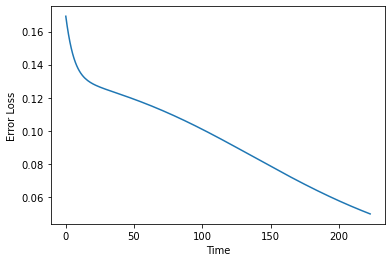

In [127]:
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim


# we're defining an initialization function here
class NANDNetwork(nn.Module):
    def __init__(self, learningRate):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(2,2)
        # Output layer
        self.output = nn.Linear(2, 1)
        
        # Define sigmoid activation and softmax output
        # these are built in activation functions for the 'nn' neural network package
        self.sigmoid = nn.Sigmoid()
        
        # add an optimizer so the weights update
        self.optimizer = optim.SGD(self.parameters(), lr=learningRate)
        
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x
    
    #Error function 
    def err(self, x, z): 
        return (x - z)**2; 
    
    #BackPropogation
    def backp(self, loss): 
        loss.backward(); 
    
    
model = NANDNetwork(0.5)


inputs = [torch.tensor((0,0,0.05),dtype=torch.float), 
        torch.tensor((1,1,0.5),dtype=torch.float),
        torch.tensor((1,0,0.95),dtype=torch.float), 
        torch.tensor((0,1,0.95),dtype=torch.float)]

totalLoss = []
for epoch_i in range(1000):
        model.optimizer.zero_grad()
        loss = 0
        for input_idx in range(len(inputs)):
            target = inputs[input_idx][2]
            ps = model.forward(inputs[input_idx][:2])
            loss += (model.err(ps, target))
        loss = loss/len(inputs)
        model.backp(loss)
        model.optimizer.step()
        totalLoss.append(loss.detach().numpy())
        if loss < 0.05:
            break
fig,axes = plt.subplots(); 
axes.plot(totalLoss)
axes.set(xlabel="Time")
axes.set(ylabel = 'Error Loss')

From my reported graphs it is always decreasing towards $0.0$ as our iterations loop. Some simulations decrease faster than other, nevertheless it is always decreasing. 

## Part B ##

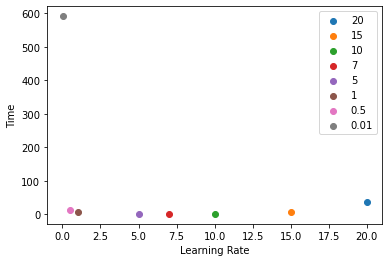

In [116]:
inputs = [torch.tensor((0,0,0.95),dtype=torch.float), 
        torch.tensor((1,1,0.5),dtype=torch.float),
        torch.tensor((1,0,0.95),dtype=torch.float), 
        torch.tensor((0,1,0.95),dtype=torch.float)]

learnStats = {}
for learnR in [20, 15, 10, 7, 5, 1, 0.5, 0.01]:
    learnStats[learnR] = []; 
    for run in range(10):
        model = NANDNetwork(learnR)
        totalLoss = []
        for epoch_i in range(1000):
                model.optimizer.zero_grad()
                loss = 0
                for input_idx in range(len(inputs)):
                    target = inputs[input_idx][2]
                    ps = model.forward(inputs[input_idx][:2])
                    loss += (model.err(ps, target))
                loss = loss/len(inputs)
                model.backp(loss)
                model.optimizer.step()
                totalLoss.append(loss.detach().numpy())
                if loss < 0.05:
                    learnStats[learnR].append(epoch_i)
                    break
                if epoch_i == 1000: 
                    learnStats[learnR].append(epoch_i)
                    
fig,axes = plt.subplots(); 
for lR in learnStats.keys(): 
    axes.scatter(lR,np.mean(learnStats[lR]))
axes.set(xlabel = 'Learning Rate')
axes.set(ylabel = 'Time')
axes.legend(learnStats)

Learning rate $r = 10 $ leads to the most rapid convergence for the neural network. 

I believe this is the case because as we increase our learning rate we rapidly decreasing the error loss. When we feed the network the new inputs it will calculate from the updated currents hence. We alos do not want to overshoot our learning rate because instead of learning faster we slow our neural network. 

We could modify the learning rate at its optimal rate to get our desired learning outcomes pace. 